In [3]:
import torchviz
import torch
import numpy as np

np.random.seed(42)
sz = 100
x = np.random.rand(sz, 1)

y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

idx = np.arange(sz)
np.random.shuffle(idx)

sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

x_train, y_train = x[train_idx], y[train_idx]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

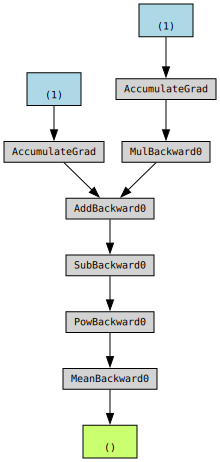

In [4]:
# visualize the calculation graph for loss
torchviz.make_dot(loss)

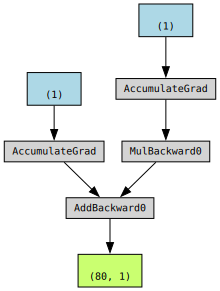

In [5]:
# visualize the calculation graph for yhat
torchviz.make_dot(yhat)

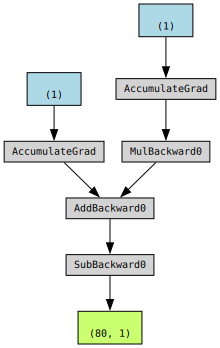

In [6]:
# visualize the calculation graph for yhat
torchviz.make_dot(error)

### Task 1 - What are the differences in the calculation graphs of `yhat` and `error`, and why?

The only difference between the `yhat` and `error` graphs is the additional `SubBackward0` node operation. We calculate `error` by subtracting `yhat` from the actual data in `y_train_tensor`. Thus, the `yhat` graph already contains all the necessary calculation operations, and we only add this subtraction, which is represented as the `SubBackward0` node.

---


In [9]:
from torch import optim, nn
import torch

np.random.seed(42)
sz = 100
x = np.random.rand(sz, 1)

y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

idx = np.arange(sz)
np.random.shuffle(idx)

sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

x_train, y_train = x[train_idx], y[train_idx]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# Learning rate
lr = 0.1

# Number of epochs
n_epochs = 1000

# Loss calculation function from the nn module of PyTorch
loss_fn = nn.MSELoss(reduction='mean')

# SGD optimizer for automatic parameter updates in each epoch
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    loss = loss_fn(yhat, y_train_tensor)

    loss.backward(retain_graph=True)

    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### Task 2 - In the template above, change the prediction based on linear regression to a more complex dependency. Up to what level of complexity in the prediction function can our simple PyTorch template handle confidently?

#### Polynomial Regression:
To make our model more complex, we can switch from linear to polynomial regression by adding terms like  x^2 . 
Our initial simple PyTorch template can handle these changes well, but if we will add more complex terms, we might need more data and better optimization to prevent overfitting and ensure stable training.

This will calc pretty quickly:

In [11]:
import torch
from torch import optim, nn

np.random.seed(42)
sz = 100
x = np.random.rand(sz, 1)

y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

idx = np.arange(sz)
np.random.shuffle(idx)

sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

x_train, y_train = x[train_idx], y[train_idx]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
c = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b, c)

lr = 0.1

n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b, c], lr=lr)

# Assuming x_train_tensor and y_train_tensor are already defined and on the same device
# x_train_tensor and y_train_tensor should be 1-dimensional tensors

for epoch in range(n_epochs):
    # Adding polynomial terms: x and x^2
    yhat = a + b * x_train_tensor + c * x_train_tensor**2

    # Calculate the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Backpropagation
    loss.backward(retain_graph=True)

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

print(a, b, c)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True) tensor([0.2345], requires_grad=True)
tensor([1.1243], requires_grad=True) tensor([1.3164], requires_grad=True) tensor([0.6555], requires_grad=True)


---

A bit slower:

In [12]:
import torch
from torch import optim, nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
coefficients = [torch.randn(1, requires_grad=True, dtype=torch.float, device=device) for _ in range(11)]
print(coefficients)

lr = 0.01

n_epochs = 10000

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD(coefficients, lr=lr)

# Assuming x_train_tensor and y_train_tensor are already defined and on the same device
# x_train_tensor and y_train_tensor should be 1-dimensional tensors

for epoch in range(n_epochs):
    # Polynomial prediction up to the 10th degree
    yhat = sum(coeff * (x_train_tensor ** i) for i, coeff in enumerate(coefficients))

    # Calculate the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Backpropagation
    loss.backward()

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Print loss to monitor progress
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{n_epochs}, Loss: {loss.item()}')

# Print the final coefficients
print(coefficients)

[tensor([0.3367], requires_grad=True), tensor([0.1288], requires_grad=True), tensor([0.2345], requires_grad=True), tensor([0.2303], requires_grad=True), tensor([-1.1229], requires_grad=True), tensor([-0.1863], requires_grad=True), tensor([2.2082], requires_grad=True), tensor([-0.6380], requires_grad=True), tensor([0.4617], requires_grad=True), tensor([0.2674], requires_grad=True), tensor([0.5349], requires_grad=True)]
Epoch 0/10000, Loss: 1.8983100652694702
Epoch 1000/10000, Loss: 0.022926056757569313
Epoch 2000/10000, Loss: 0.01077478937804699
Epoch 3000/10000, Loss: 0.008561764843761921
Epoch 4000/10000, Loss: 0.00814473070204258
Epoch 5000/10000, Loss: 0.008053765632212162
Epoch 6000/10000, Loss: 0.008023315109312534
Epoch 7000/10000, Loss: 0.008005276322364807
Epoch 8000/10000, Loss: 0.007990780286490917
Epoch 9000/10000, Loss: 0.007978120818734169
[tensor([1.0954], requires_grad=True), tensor([1.3603], requires_grad=True), tensor([0.8508], requires_grad=True), tensor([0.4373], req

---

Running this on a laptop without a GPU (and maybe even with a GPU) will give you enough time to brew coffee, and maybe even take a nap.

In [1]:
import torch
from torch import optim, nn

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
# Initialize parameters for a 20th-degree polynomial
coefficients = [torch.randn(1, requires_grad=True, dtype=torch.float, device=device) for _ in range(500)]
print(coefficients)

# Learning rate
lr = 0.001

# Number of epochs
n_epochs = 20000

# Loss calculation function from the nn module of PyTorch
loss_fn = nn.MSELoss(reduction='mean')

# Generate a larger dataset
x_train_tensor = torch.linspace(-1, 1, 1000, device=device)
y_train_tensor = sum(coeff * (x_train_tensor ** i) for i, coeff in enumerate(coefficients)) + torch.randn(1000, device=device) * 0.1

# SGD optimizer for automatic parameter updates in each epoch
optimizer = optim.SGD(coefficients, lr=lr)

for epoch in range(n_epochs):
    # Polynomial prediction up to the 20th degree
    yhat = sum(coeff * (x_train_tensor ** i) for i, coeff in enumerate(coefficients))

    # Calculate the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Backpropagation
    loss.backward(retain_graph=True)  # Retain the graph for multiple backward passes

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Print loss occasionally to monitor progress (optional)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{n_epochs}, Loss: {loss.item()}')

# Print the final coefficients
print(coefficients)

[tensor([0.3367], requires_grad=True), tensor([0.1288], requires_grad=True), tensor([0.2345], requires_grad=True), tensor([0.2303], requires_grad=True), tensor([-1.1229], requires_grad=True), tensor([-0.1863], requires_grad=True), tensor([2.2082], requires_grad=True), tensor([-0.6380], requires_grad=True), tensor([0.4617], requires_grad=True), tensor([0.2674], requires_grad=True), tensor([0.5349], requires_grad=True), tensor([0.8094], requires_grad=True), tensor([1.1103], requires_grad=True), tensor([-1.6898], requires_grad=True), tensor([-0.9890], requires_grad=True), tensor([0.9580], requires_grad=True), tensor([1.3221], requires_grad=True), tensor([0.8172], requires_grad=True), tensor([-0.7658], requires_grad=True), tensor([-0.7506], requires_grad=True), tensor([1.3525], requires_grad=True), tensor([0.6863], requires_grad=True), tensor([-0.3278], requires_grad=True), tensor([0.7950], requires_grad=True), tensor([0.2815], requires_grad=True), tensor([0.0562], requires_grad=True), ten

#### Summary: 
The simple basic PyTorch template can confidently handle prediction functions of up to around a 10th-degree polynomial complexity. Beyond this, training times become impractically long, and the risk of overfitting increases significantly (running these several time might end up with weird runtime errors even with `retain_graph=True` passed to loss.backward()